In [4]:
import csv
from pathlib import Path
import matplotlib.pyplot as plt
from datetime import datetime

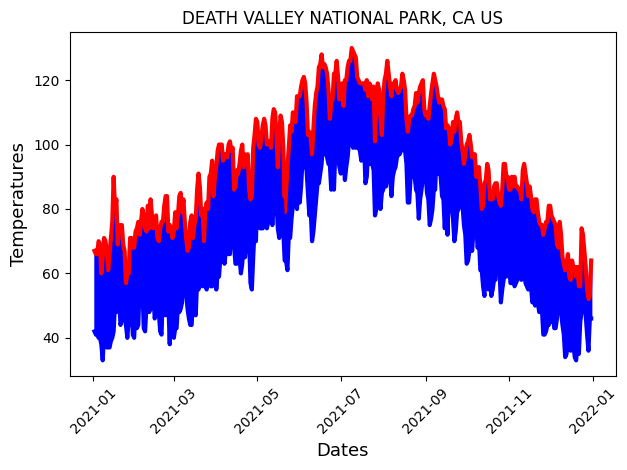

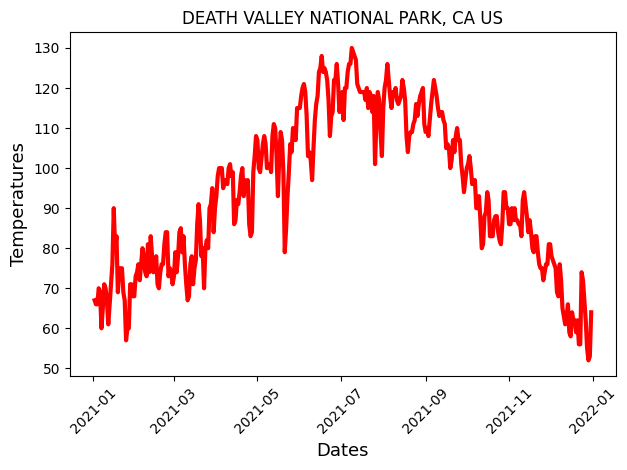

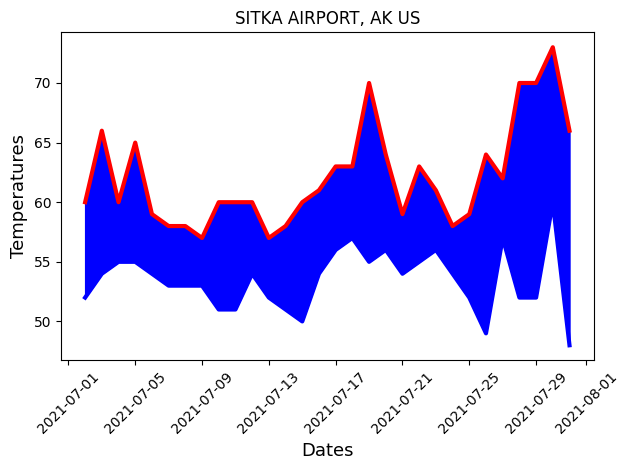

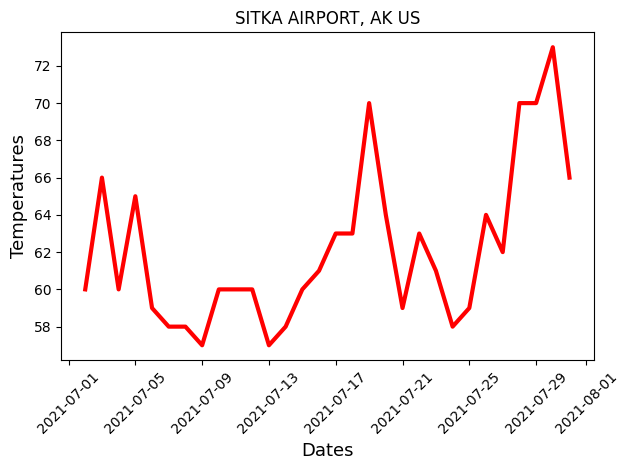

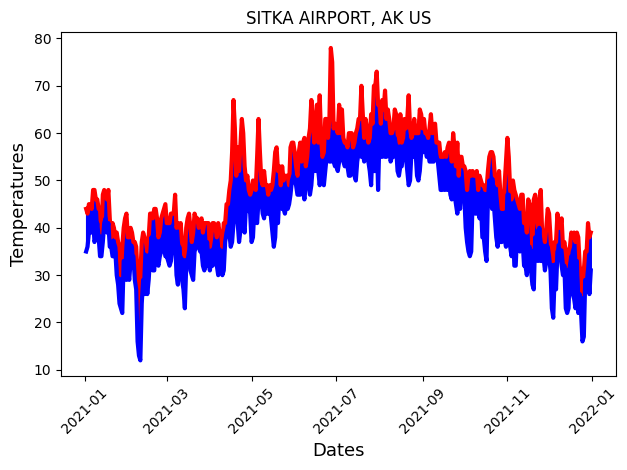

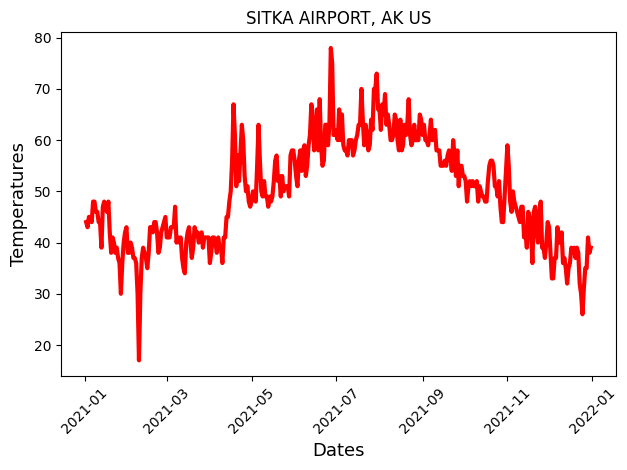

In [11]:

def temperature(filepath:str, linewidth:int = 3, show_low_temp:bool = False):
    
    path = Path(filepath)                                                                                   # Step #1: Define the location of the file                         
    lines = path.read_text().splitlines()                                                                   # Step #2: Extract the content of the file
    reader = csv.reader(lines)                                                                              # Step #3: Create a csv reader

    header = next(reader)                                                                                   # read the first row (header)

    # Dynamically find indexes for DATE, TMAX, TMIN
    date_index = header.index("DATE")
    tmax_index = header.index("TMAX")
    tmin_index= header.index("TMIN")


    dates = []
    max_temperatures = []
    min_temepratures = []

    for index, row in enumerate(reader):
        if index == 0:                                                                                      # Gurard statemet to skid the header
            continue


        if row[date_index] == "" or row[tmax_index] == "" or (show_low_temp and row[tmin_index] == ""):     # Skip row if any important column is missing - This is important for data cleaning to avoid errors or incorrect plots
            continue

        date = datetime.strptime(row[2], "%Y-%m-%d")                                                         # Column for date
        high_temp = int(row[tmax_index])                                                                     # Column for TMAX
        
        dates.append(date)
        max_temperatures.append(high_temp)
     

        if show_low_temp:
            low_temp = int(row[tmin_index])                                                                  # Column for TMIN
            min_temepratures.append(low_temp)
    

    # Plotting
    #x_data = dates
    #y_data = max_temperatures                                        
    plt.plot(dates, max_temperatures, color="red", linewidth=linewidth)                                      # Plot max temp line

    if show_low_temp:
        #y2_data = min_temepratures                                                                          # Another y value for min temperatures
        plt.plot(dates, min_temepratures, color="blue", linewidth=linewidth)                                 # Plot min temp line
        plt.fill_between(dates, max_temperatures, min_temepratures, color="blue")                            # Shade between max and min temperatures


    #title = filepath.split("/")[-1].replace("_", " ").replace(".csv", "").title()                           # Title from the filename: Option 1
    #plt.title(title)                                                                                           
    plt.title(row[1])                                                                                        # Option 2


    plt.xlabel(xlabel="Dates", fontsize=13)
    plt.ylabel(ylabel="Temperatures", fontsize=13)
    plt.xticks(rotation=45)                                                                                  # Rotate date labels to avoid overlap
    plt.tight_layout()                                                                                       # Adjust layout to fit everything

    plt.show()

    
data1 = temperature(filepath="datasets/death_valley_2021_simple.csv",show_low_temp=True)
data2 = temperature(filepath="datasets/death_valley_2021_simple.csv")
data3 = temperature(filepath="datasets/sitka_weather_07-2021_simple.csv", show_low_temp=True)
data4 = temperature(filepath="datasets/sitka_weather_07-2021_simple.csv")
data5 = temperature(filepath="datasets/sitka_weather_2021_simple.csv", show_low_temp=True)
data6 = temperature(filepath="datasets/sitka_weather_2021_simple.csv")